In [5]:
# SVM hard margin
class SupportVectorMachine(object):
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import style
    
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = self.plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self,data,label):
        self.data = data
        self.label = label
        
        # optimization 
        # {||w||:[w,b]} save magnitude
        opt_dict = {}
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        # find max feature and min feature
        max_value, min_value = None,None
        for i in range(len(data)):
            for feature in data[i]:
                if(max_value==None) and (min_value==None):
                    max_value =feature
                    min_value = feature
                if(feature > max_value):
                    max_value = feature
                if(feature < min_value):
                    min_value = feature
        self.max_feature_value = max_value
        self.min_feature_value = min_value
        # set step size
        step_sizes = [self.max_feature_value*0.1,
                     self.max_feature_value*0.01,
                     # point of expensive
                     self.max_feature_value*0.001]

        # extremely expensive
        b_range_multiple = 5
        # 
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = self.np.array([latest_optimum,latest_optimum])
            # we can do this because svm is convex problem
            optimized = False
            while not optimized:
                for b in self.np.arange(-1*(self.max_feature_value*b_range_multiple), 
                                        self.max_feature_value*b_range_multiple, step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        fit_constraint = True
                        # yi(xi.w+b) >= 1 constraint
                        for i in range(len(data)):
                            xi = data[i]
                            yi = label[i]
                            if not yi*(self.np.dot(w_t,xi)+b) >= 1:
                                fit_constraint = False
                                break
                                
                        if fit_constraint:
                            opt_dict[self.np.linalg.norm(w_t)] = [w_t,b]
                        #print(opt_dict)
                print(w)
                if w[0] < 0:
                    optimized = True
                    print(w)
                    print('Optimized a step.')
                else:
                    w = w - step
            norms = sorted([n for n in opt_dict])
            print(norms)
            print(opt_dict[norms[0]])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
        for i in range(len(data)):
            xi = data[i]
            yi = label[i]
            print(xi," : ",yi*(self.np.dot(self.w,xi)+self.b))
        
    def predict(self,data):
        # sign of (data.w+b)
        classification = self.np.sign(self.np.dot(data,self.w)+self.b)
        # if the classification isn't zero, and we have visualization on, we graph
        if classification != 0 and self.visualization:
            self.ax.scatter(data[0],data[1],s=200,marker='*', c=self.colors[classification])
        else:
            print('featureset',data,'is on the decision boundary')
        return classification
    
    def hyperplane(self,x,w,b,v):
        # v = (w.x+b)
        return (-w[0]*x-b+v) / w[1]
    
    def visualize(self):
        #scattering known featuresets.
        for i in range(len(self.data)):
            [self.ax.scatter(data[i][0],data[i][1],s=100,color=self.colors[self.label[i]])]
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        # w.x + b = 1
        # pos sv hyperplane
        psv1 = self.hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = self.hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max], [psv1,psv2], "k")
        # w.x + b = -1
        # negative sv hyperplane
        nsv1 = self.hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = self.hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max], [nsv1,nsv2], "k")

        # w.x + b = 0
        # decision
        db1 = self.hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = self.hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max], [db1,db2], "g--")

        self.plt.show()
        

[80 80]
[79.2 79.2]
[78.4 78.4]
[77.6 77.6]
[76.8 76.8]
[76. 76.]
[75.2 75.2]
[74.4 74.4]
[73.6 73.6]
[72.8 72.8]
[72. 72.]
[71.2 71.2]
[70.4 70.4]
[69.6 69.6]
[68.8 68.8]
[68. 68.]
[67.2 67.2]
[66.4 66.4]
[65.6 65.6]
[64.8 64.8]
[64. 64.]
[63.2 63.2]
[62.4 62.4]
[61.6 61.6]
[60.8 60.8]
[60. 60.]
[59.2 59.2]
[58.4 58.4]
[57.6 57.6]
[56.8 56.8]
[56. 56.]
[55.2 55.2]
[54.4 54.4]
[53.6 53.6]
[52.8 52.8]
[52. 52.]
[51.2 51.2]
[50.4 50.4]
[49.6 49.6]
[48.8 48.8]
[48. 48.]
[47.2 47.2]
[46.4 46.4]
[45.6 45.6]
[44.8 44.8]
[44. 44.]
[43.2 43.2]
[42.4 42.4]
[41.6 41.6]
[40.8 40.8]
[40. 40.]
[39.2 39.2]
[38.4 38.4]
[37.6 37.6]
[36.8 36.8]
[36. 36.]
[35.2 35.2]
[34.4 34.4]
[33.6 33.6]
[32.8 32.8]
[32. 32.]
[31.2 31.2]
[30.4 30.4]
[29.6 29.6]
[28.8 28.8]
[28. 28.]
[27.2 27.2]
[26.4 26.4]
[25.6 25.6]
[24.8 24.8]
[24. 24.]
[23.2 23.2]
[22.4 22.4]
[21.6 21.6]
[20.8 20.8]
[20. 20.]
[19.2 19.2]
[18.4 18.4]
[17.6 17.6]
[16.8 16.8]
[16. 16.]
[15.2 15.2]
[14.4 14.4]
[13.6 13.6]
[12.8 12.8]
[12. 12.]
[11.2 

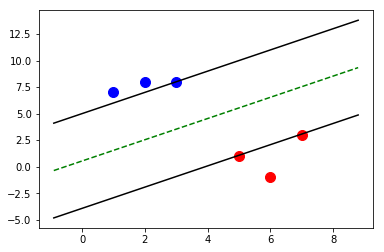

In [6]:
data = [[1,7],[2,8],[3,8],[5,1],[6,-1],[7,3]]
label = [-1,-1,-1,1,1,1]
test_data = [[0,10],[1,3],[3,4],[3,5],[5,5],[5,6],[6,-5],[5,8]]

svm = SupportVectorMachine()
svm.fit(data, label)
svm.visualize()

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
label = iris.target

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(data, label)
print(clf.predict(data[-5:]))
y_pred = clf.predict(data)
print("Number of mislabeled points out of a total %d points : %d"% (iris.data.shape[0],(iris.target != y_pred).sum()))